# Task 3 :  Sales Prediction using Python
# Author:  Kirti Gupta

**Task : Sales Prediction using Python**

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.

# **Data Description**

* **TV**: Represents the advertising budget spent on TV advertising.
* **Radio**: Represents the advertising budget spent on radio advertising.
* **Newspaper**: Represents the advertising budget spent on newspaper advertising.
* **Sales**: Represents the corresponding sales generated.**(Target)**

In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/codsoft-sales-prediction/advertising.csv


# **Importing Libraries and Dataset**

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [128]:
data = pd.DataFrame(pd.read_csv("/kaggle/input/codsoft-sales-prediction/advertising.csv"))
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# **Data**

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [130]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [131]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [132]:
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  200
Number of columns are:  4


In [133]:
# Checking for null values and missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [134]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


# **VISUALIZATION**

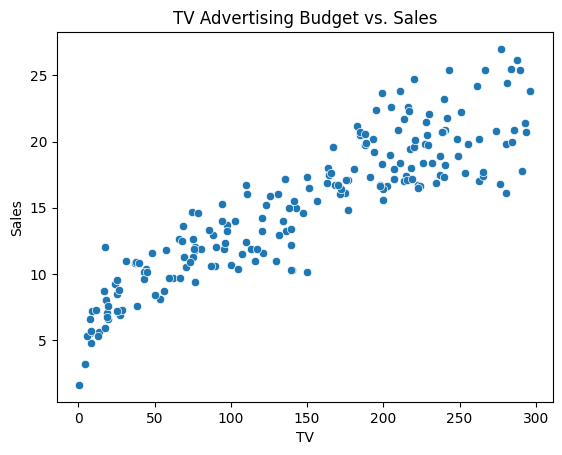

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of TV advertising budget vs. Sales
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV Advertising Budget vs. Sales')
plt.show()

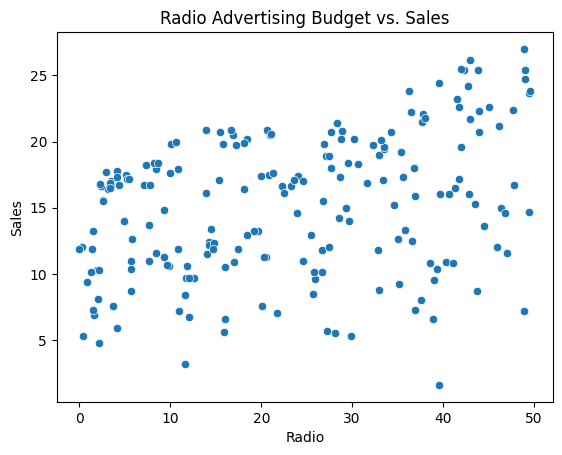

In [136]:
# Scatter plot of Radio advertising budget vs. Sales
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Radio Advertising Budget vs. Sales')
plt.show()

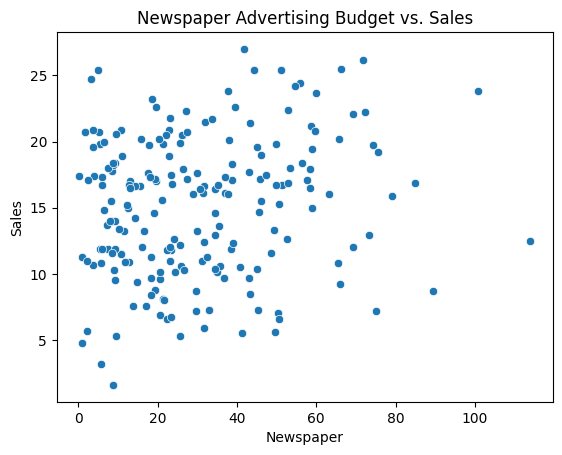

In [137]:
# Scatter plot of Newspaper advertising budget vs. Sales
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper Advertising Budget vs. Sales')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

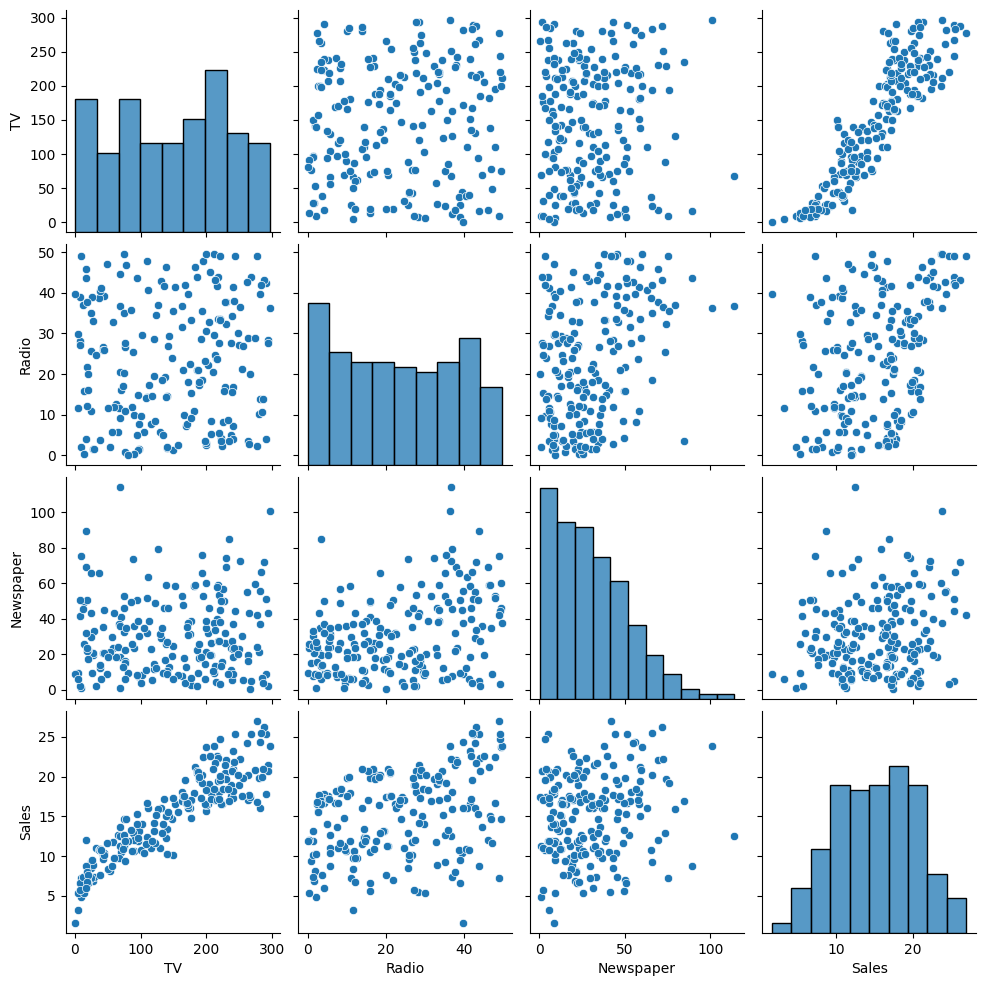

In [138]:
# Pair plot of all features
sns.pairplot(data)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

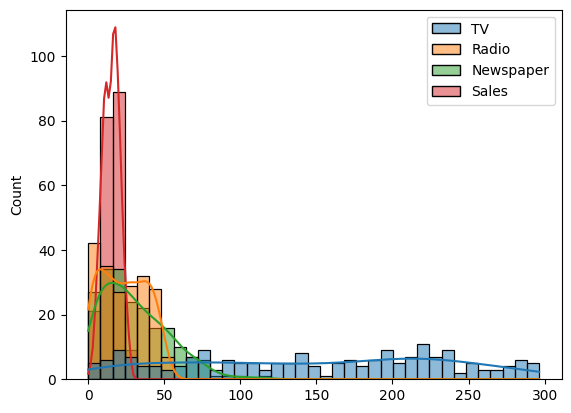

In [139]:
# Histograms of all features
sns.histplot(data, kde=True)
plt.show()

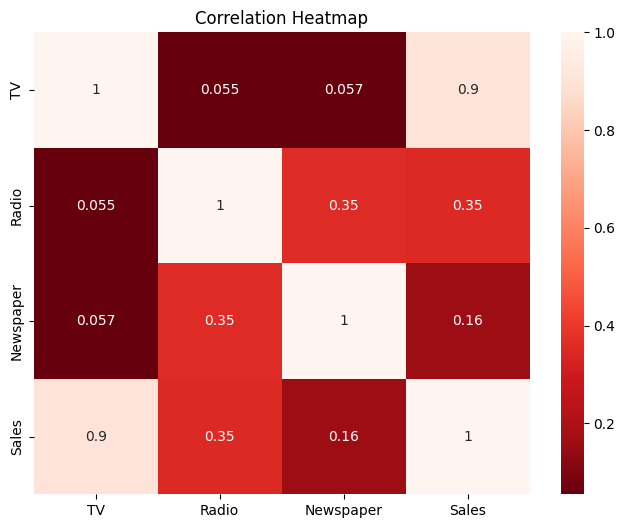

In [140]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='Reds_r')
plt.title('Correlation Heatmap')
plt.show()

# **TEST AND TRAIN DATASET SPLIT**

In [141]:
# X are the features of the dataset
X = data.drop(['Sales'], axis=1)

# y is the target of the dataset
y = data["Sales"] 

x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2) 

In [142]:
# Checking the shape of train and test datasets

print("Train dataset\n",x_train.shape,"\n",y_train.shape[0])
print("\n")
print("Test dataset\n",x_test.shape,"\n",y_test.shape[0])

Train dataset
 (160, 3) 
 160


Test dataset
 (40, 3) 
 40


# **MODEL TRAINING**
* Linear Regression 
* Ridge Regression
* Lasso Regression

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error for Linear Regression:", mse)
print("R-squared Score for Linear Regression:", r2)


Mean Squared Error for Linear Regression: 2.5161440181062393
R-squared Score for Linear Regression: 0.8696730608447851


In [144]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression model
ridge = Ridge()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Initialize Ridge regression model with the best hyperparameters
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(x_train, y_train)

# Make predictions on the test data
y_pred = ridge_best.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Alpha for Ridge Regression:", best_alpha)
print("Mean Squared Error for Ridge Regression:", mse)
print("R-squared Score for Ridge Regression:", r2)

Best Alpha for Ridge Regression: 100
Mean Squared Error for Ridge Regression: 2.5126512140308344
R-squared Score for Ridge Regression: 0.8698539751568996


In [147]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Lasso regression model
lasso = Lasso()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Initialize Lasso regression model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lasso_best.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Alpha for Lasso Regression:", best_alpha)
print("Mean Squared Error for Lasso Regression:", mse)
print("R-squared Score for Lasso Regression:", r2)


Best Alpha for Lasso Regression: 1
Mean Squared Error for Lasso Regression: 2.449827094642346
R-squared Score for Lasso Regression: 0.8731080318110913
